# Listing 2.1 Loading the Fashion MNIST dataset in Keras

- Model Architecture
    - Data preprocessing
- Model compilation 
- Model Training
- Model Testing
- Model Prediction

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

0


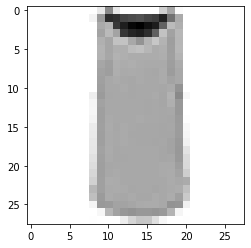

In [4]:
i = 2
tr_digit = train_images[i]
tr_label = train_labels[i]
print(tr_label)

plt.imshow(tr_digit, cmap=plt.cm.binary)
plt.show()

In [5]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

1


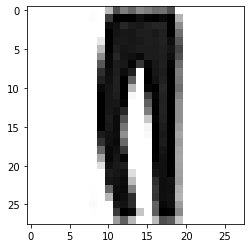

In [6]:
i = 2
ts_digit = test_images[i]
ts_label = test_labels[i]
print(ts_label)

plt.imshow(ts_digit, cmap=plt.cm.binary)
plt.show()

In [7]:
print(len(train_images))
print(len(test_images))

print(len(train_labels))
print(len(test_labels))

60000
10000
60000
10000


In [8]:
tr_digit.ndim

2

In [9]:
train_images.ndim

3

In [10]:
tr_digit.shape

(28, 28)

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
test_images.shape

(10000, 28, 28)

## Listing 2.2 The network architecture

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [14]:
(28*28,)

(784,)

In [15]:
tr_digit.shape

(28, 28)

In [16]:
tr_digit.reshape((28*28)).shape

(784,)

In [17]:
55000/60000

0.9166666666666666

## Listing 2.3 The compilation step

In [18]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [19]:
# Y->One-Hot_encoding
train_labels[0]

9

# Listing 2.4 Preparing the image data

In [20]:
train_images = train_images.reshape((60000, 28 * 28)) # Reshape
train_images = train_images.astype('float32') / 255 # Normalization

test_images = test_images.reshape((10000, 28 * 28)) # Reshape
test_images = test_images.astype('float32') / 255 # Normalization

# Listing 2.5 Preparing the labels

In [21]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [23]:
train_images.shape

(60000, 784)

In [24]:
(60000,28*28)

(60000, 784)

# Now Train Our Model

In [25]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.5643 - accuracy: 0.8005
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 0.3814 - accuracy: 0.8602
Epoch 3/5
469/469 [==============================] - 6s 14ms/step - loss: 0.3373 - accuracy: 0.8752
Epoch 4/5
469/469 [==============================] - 6s 14ms/step - loss: 0.3103 - accuracy: 0.8848
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.2920 - accuracy: 0.8916


# Now Test on Unseen Data

In [26]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3745 - accuracy: 0.8657
test_acc: 0.8657000064849854
